<a href="https://colab.research.google.com/github/Laureeeeee/Heart-failure/blob/main/Heartfailure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


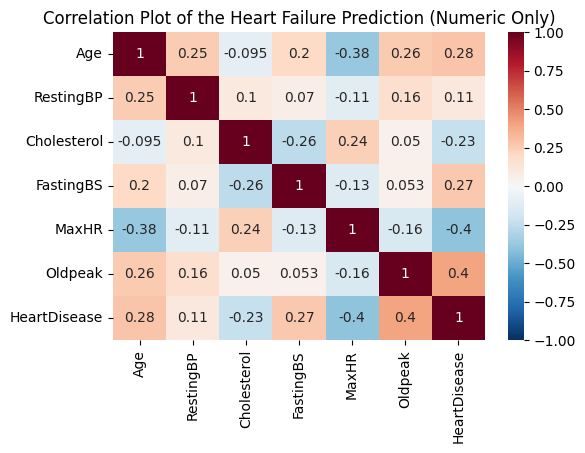

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Importing the numpy library

df = pd.read_csv('heart.csv')
df_numeric = pd.read_csv('heart.csv')
df_numeric = df_numeric.select_dtypes(include=[np.number]) # Now np is defined and can be used
corr = df_numeric.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Plot of the Heart Failure Prediction (Numeric Only)')
plt.show()
plt.clf()

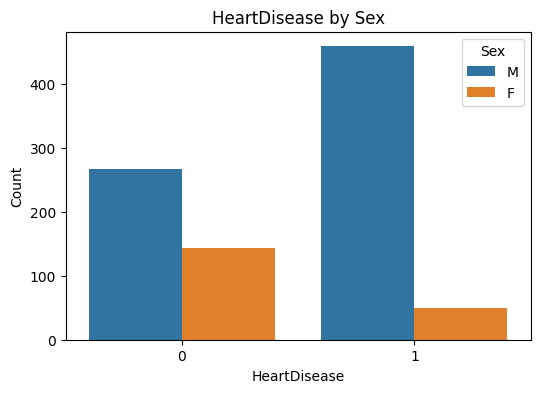

<Figure size 640x480 with 0 Axes>

In [6]:
if 'HeartDisease' in df.columns and 'Sex' in df.columns:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x='HeartDisease', hue='Sex')
  plt.title('HeartDisease by Sex')
  plt.xlabel('HeartDisease')
  plt.ylabel('Count')
  plt.show()
  plt.clf()

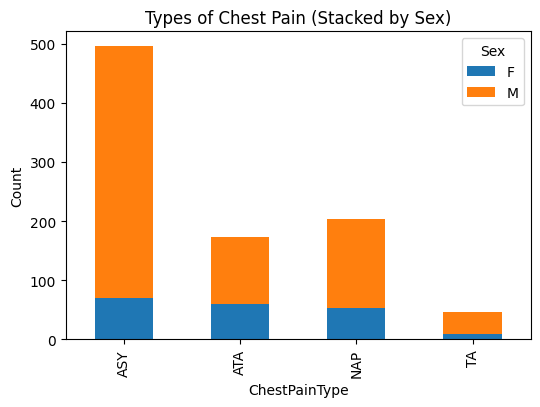

<Figure size 640x480 with 0 Axes>

In [7]:
if 'ChestPainType' in df.columns and 'Sex' in df.columns:
  ctab = pd.crosstab(df['ChestPainType'], df['Sex'])
  ctab.plot(kind='bar', stacked=True, figsize=(6,4))
  plt.title('Types of Chest Pain (Stacked by Sex)')
  plt.xlabel('ChestPainType')
  plt.ylabel('Count')
  plt.show()
  plt.clf()

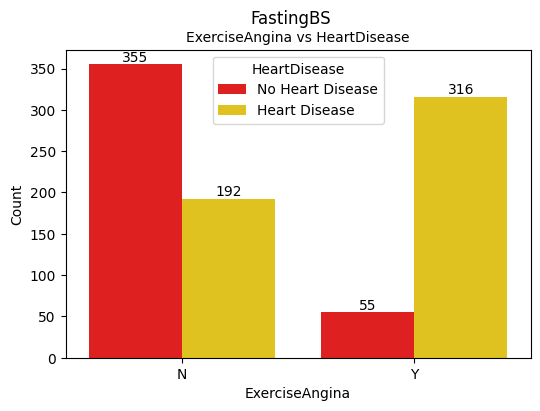

In [8]:
if 'HeartDisease' in df.columns:
  df['HeartDisease'] = df['HeartDisease'].map({0: 'No Heart Disease', 1: 'Heart Disease'})




plt.figure(figsize=(6,4))
ax = sns.countplot(
  data=df,
  x='ExerciseAngina',
  hue='HeartDisease',
  palette={'No Heart Disease': 'red', 'Heart Disease': 'gold'}
)




for container in ax.containers:
  ax.bar_label(container)




plt.suptitle('FastingBS', fontsize=12)
plt.title('ExerciseAngina vs HeartDisease', fontsize=10)




plt.xlabel('ExerciseAngina')
plt.ylabel('Count')




plt.show()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Seaborn and Matplotlib are properly installed! ✅")

from sklearn.preprocessing import LabelEncoder

# Création d'un encodeur
le = LabelEncoder()

# Conversion des colonnes catégorielles en numériques
df["Sex"] = le.fit_transform(df["Sex"])
df["ChestPainType"] = le.fit_transform(df["ChestPainType"])
df["RestingECG"] = le.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = le.fit_transform(df["ST_Slope"])

print("The categorical data has been converted into numbers! ✅")

from sklearn.model_selection import train_test_split

# Définir les variables
X = df.drop("HeartDisease", axis=1)  # Variables explicatives
y = df["HeartDisease"]  # Variable cible (0 = pas malade, 1 = malade)

# Séparer les données en entraînement (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The data is properly split into training and test sets! ✅")

from sklearn.ensemble import RandomForestClassifier

# Création du modèle
model = RandomForestClassifier()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

print("The model has been successfully trained! ✅")

from sklearn.metrics import accuracy_score

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
precision = accuracy_score(y_test, y_pred)
print("Model accuracy:", precision)


Seaborn and Matplotlib are properly installed! ✅
The categorical data has been converted into numbers! ✅
The data is properly split into training and test sets! ✅
The model has been successfully trained! ✅
Model accuracy: 0.8858695652173914
